- 异常值处理

In [1]:
import pandas as pd

In [2]:
df = pd.read_table('sunspots.csv', sep=',')
df.head()

,year,counts
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0


- 方差法检测异常值:检查是否超过均值两个标准差

In [3]:
xbar = df.counts.mean()
xstd = df.counts.std()

In [4]:
any(df.counts > xbar + 2 * xstd)

True

In [6]:
any(df.counts < xbar - 2 * xstd)

False

- 箱线图法检测异常：检查是否有大于Q3或者小于Q1 1.5倍IQR存在

In [7]:
Q1 = df.counts.quantile(q=0.25)
Q3 = df.counts.quantile(q=0.75)
IQR = Q3 - Q1

In [8]:
any(df.counts > Q3 + 1.5 * IQR)

True

In [9]:
any(df.counts < Q1 - 1.5 * IQR)

False

- 查看数据分布

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


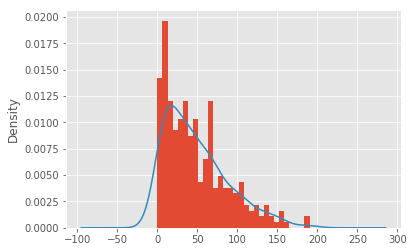

In [11]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

df.counts.plot(kind='hist', bins=30, normed=True)

df.counts.plot(kind='kde')
plt.show()

- 处理异常值：由于是右偏分布，所以使用箱线图法识别和处理异常值(第一种方法适合正态分布)

In [12]:
df.counts.describe()

count    289.000000
mean      48.613495
std       39.474103
min        0.000000
25%       15.600000
50%       39.000000
75%       68.900000
max      190.200000
Name: counts, dtype: float64

- 替换法处理：替换为小于异常值的最大值

In [13]:
UL = Q3 + 1.5 * IQR

replace_value = df.counts[df.counts < UL].max()

In [15]:
df.counts[df.counts > UL] = replace_value

df.counts.describe()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    289.000000
mean      48.066090
std       37.918895
min        0.000000
25%       15.600000
50%       39.000000
75%       68.900000
max      141.700000
Name: counts, dtype: float64